<a href="https://colab.research.google.com/github/HangBuiC/HTM737/blob/main/Week_9_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib is a library, pylot is a sub in that library.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/ESRD.csv')

In [4]:
#Q1: visualizing top 10 owners
'''
From last time, we knew that we need to remove rows with total performance score = 'No score'
and also to convert the Total Performance Score to integer
'''

df_filt = df[df['Total Performance Score'] != 'No Score'].copy()
df_filt['Total Performance Score'] = df_filt['Total Performance Score'].astype(int)

In [5]:
#The question mentions ownership, let's search for what columns we should be using?
search_word = 'ownership'
for column in df.columns:
    if search_word in column.lower():
        print(column)

Ownership as of December 31, 2016
Date of Ownership Record Update


In [6]:
df_filt['Ownership as of December 31, 2016'].head()

,"Ownership as of December 31, 2016"
0,NOT A CHAIN
1,FRESENIUS MEDICAL CARE
2,DAVITA
3,DAVITA
4,DAVITA


In [7]:
#Let's rename the column to make it shorter and more meaningful
df_filt['Ownership'] = df_filt['Ownership as of December 31, 2016']

#Now we need to do group by ownership with counts and select top 10 owners


In [8]:
#old way which gives the same results
#owner_counts = df_filt.groupby('Ownership').size().sort_values(ascending=False).head(10)

#new way that's shorter and gives the exact same results!!! how beautiful?
owner_counts = df_filt['Ownership'].value_counts().head(10)

#value_counts is a shortcut to groupby.size().sort_values(ascending = false)

In [9]:
owner_counts

,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187
"US RENAL CARE, INC.",155
SATELLITE HEALTHCARE,60
DIVERSIFIED SPECIALTY INSTITUTES (DSI),52
OTHER,46


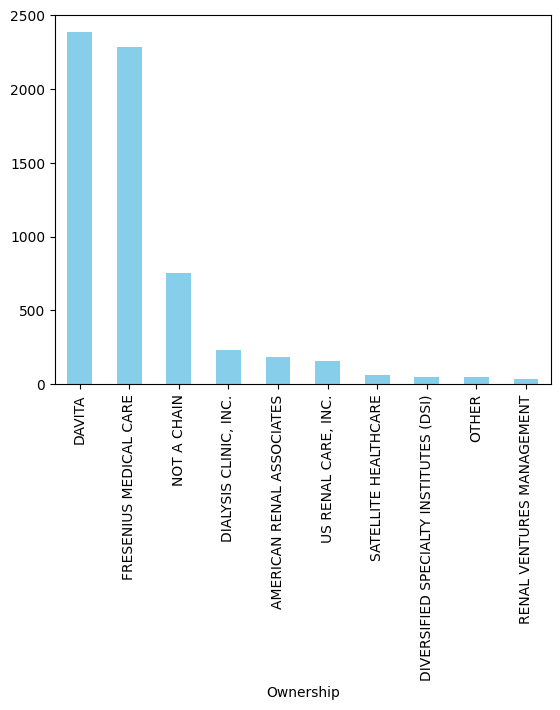

In [10]:
#Now we want to convert the above table to a bar graph
owner_counts.plot(kind='bar', color='#87CEEB') #Here we can type both color code or just type the description of the color 'skyblue'
plt.show()
#plot.show() is similar to print(your_variable) in analogy
#What are we missing?

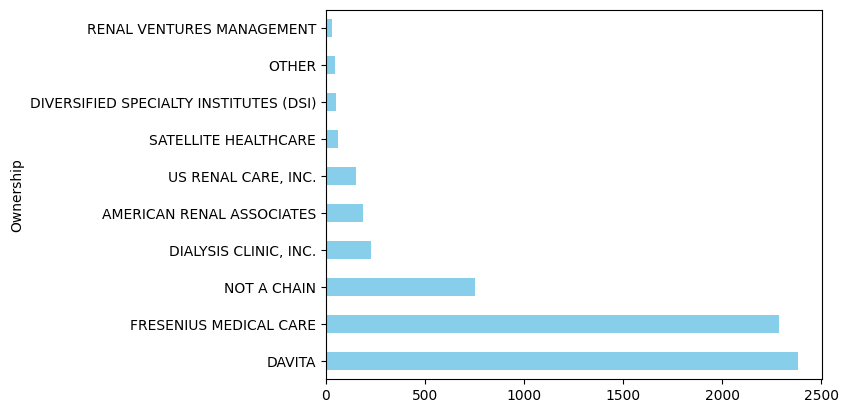

In [11]:
#If we want to change to horizontal bar -> 'barh'
owner_counts.plot(kind='barh', color='#87CEEB')
plt.show()

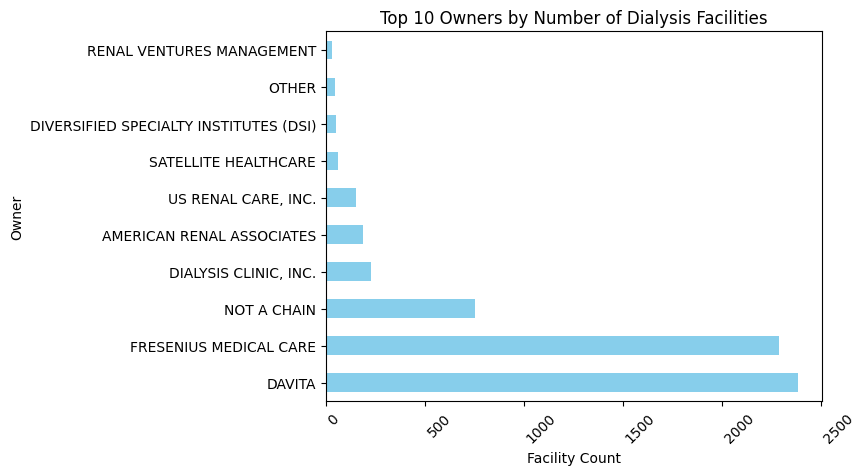

In [12]:
owner_counts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')
plt.ylabel('Owner')
plt.xlabel('Facility Count')
plt.xticks(rotation=45, ha='left') #ha = horizontal alignment (data to the left)
plt.show()

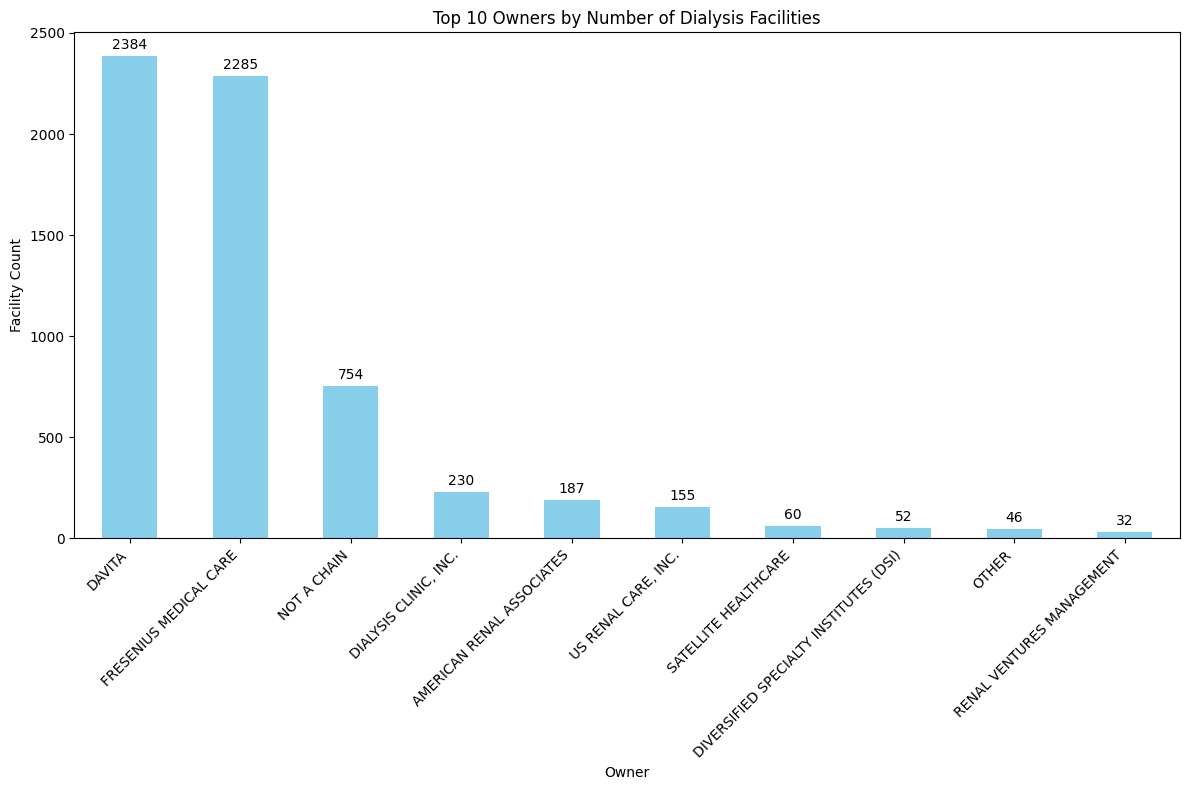

In [13]:
#sometimes, we want to assign the plot to an object to do further processing
plt.figure(figsize=(12, 8))
ax = owner_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')
plt.xlabel('Owner')
plt.ylabel('Facility Count')
plt.xticks(rotation=45, ha='right') #ha = horizontal alignment

# Add data labels
ax.bar_label(ax.containers[0], labels=owner_counts.values, padding=3)
#what does "padding=3" do?
#a good practice to learn is to remove it and then see what happens?
#you can also change it
#let's try this in tight_layout()

plt.tight_layout()
plt.show()

In [14]:
search_word = 'performance'
for column in df.columns:
    if search_word in column.lower():
        print(column)

Total Performance Score


In [15]:
#Q2: visualize the total performance score for the top 10 owners
#We need to get the data first, what shape?
owner_counts.head()

,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187


In [16]:
df.head()

,Facility Name,CMS Certification Number (CCN),Alternate CCN 1,Address 1,Address 2,City,State,Zip Code,Network,VAT Catheter Measure Score,...,STrR Improvement Measure Rate/Ratio,STrR Improvement Period Numerator,STrR Improvement Period Denominator,STrR Measure Score Applied,National Avg STrR Measure Score,Total Performance Score,PY2018 Payment Reduction Percentage,CMS Certification Date,"Ownership as of December 31, 2016",Date of Ownership Record Update
0,CHILDRENS HOSPITAL DIALYSIS,12306,013300,1600 7TH AVENUE SOUTH,-,BIRMINGHAM,AL,35233,8,No Score,...,No Ratio,NaN,NaN,NaN,5,70,No Reduction,11/17/1982,NOT A CHAIN,3/6/2012
1,FMC CAPITOL CITY,12500,-,255 S JACKSON STREET,-,MONTGOMERY,AL,36104,8,5,...,0.943,20.0,21.203,Achievement,5,64,No Reduction,9/1/1976,FRESENIUS MEDICAL CARE,3/6/2012
2,GADSDEN DIALYSIS,12501,-,409 SOUTH FIRST STREET,-,GADSDEN,AL,35901,8,5,...,1.283,18.0,14.032,Achievement,5,49,No Reduction,9/1/1976,DAVITA,11/18/2009
3,TUSCALOOSA UNIVERSITY DIALYSIS,12502,-,220 15TH STREET,-,TUSCALOOSA,AL,35401,8,7,...,0.993,23.0,23.161,Achievement,5,54,No Reduction,10/21/1977,DAVITA,11/17/2009
4,PCD MONTGOMERY,12505,-,1001 FOREST AVENUE,-,MONTGOMERY,AL,36106,8,7,...,0.433,9.0,20.801,Achievement,5,71,No Reduction,12/14/1977,DAVITA,3/16/2012


In [17]:
owner_counts.index

Index(['DAVITA', 'FRESENIUS MEDICAL CARE', 'NOT A CHAIN',
       'DIALYSIS CLINIC, INC.', 'AMERICAN RENAL ASSOCIATES',
       'US RENAL CARE, INC.', 'SATELLITE HEALTHCARE',
       'DIVERSIFIED SPECIALTY INSTITUTES (DSI)', 'OTHER',
       'RENAL VENTURES MANAGEMENT'],
      dtype='object', name='Ownership')

In [18]:
df.index

RangeIndex(start=0, stop=6825, step=1)

In [19]:
#bringing the fields for only the top 10 using merge/join
df_top10 = pd.merge(df_filt, owner_counts, left_on='Ownership', right_index=True)


<Figure size 1400x700 with 0 Axes>

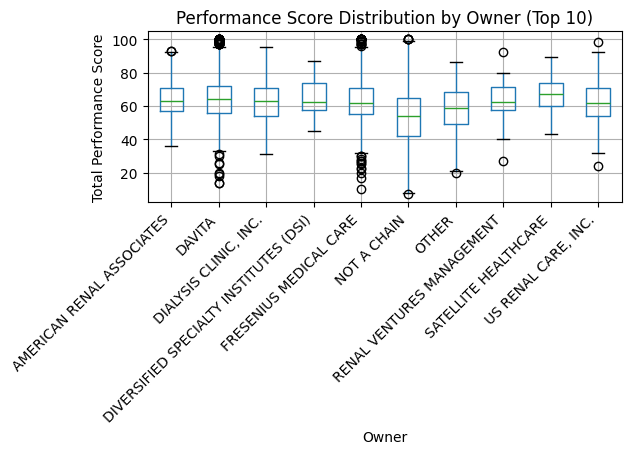

In [20]:

plt.figure(figsize=(14, 7)) #numbers here are in inches
df_top10.boxplot(column='Total Performance Score', by='Ownership')
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

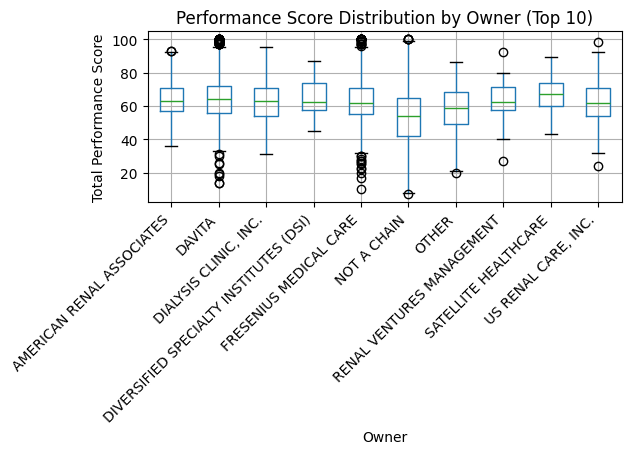

In [21]:
#a cleaner shortcut using "isin"
top10_owners = owner_counts.index
df_top10 = df_filt[df_filt['Ownership'].isin(top10_owners)]

plt.figure(figsize=(14, 7)) #numbers here are in inches
df_top10.boxplot(column='Total Performance Score', by='Ownership')
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#Q3: visualize average for each of the top 10 centers
avg_scores = df_top10.groupby('Ownership')['Total Performance Score'].mean()


In [23]:
avg_scores

,Total Performance Score
Ownership,
AMERICAN RENAL ASSOCIATES,63.529412
DAVITA,63.911493
"DIALYSIS CLINIC, INC.",62.821739
DIVERSIFIED SPECIALTY INSTITUTES (DSI),64.865385
FRESENIUS MEDICAL CARE,62.894530
NOT A CHAIN,53.397878
OTHER,57.456522
RENAL VENTURES MANAGEMENT,62.406250
SATELLITE HEALTHCARE,66.816667


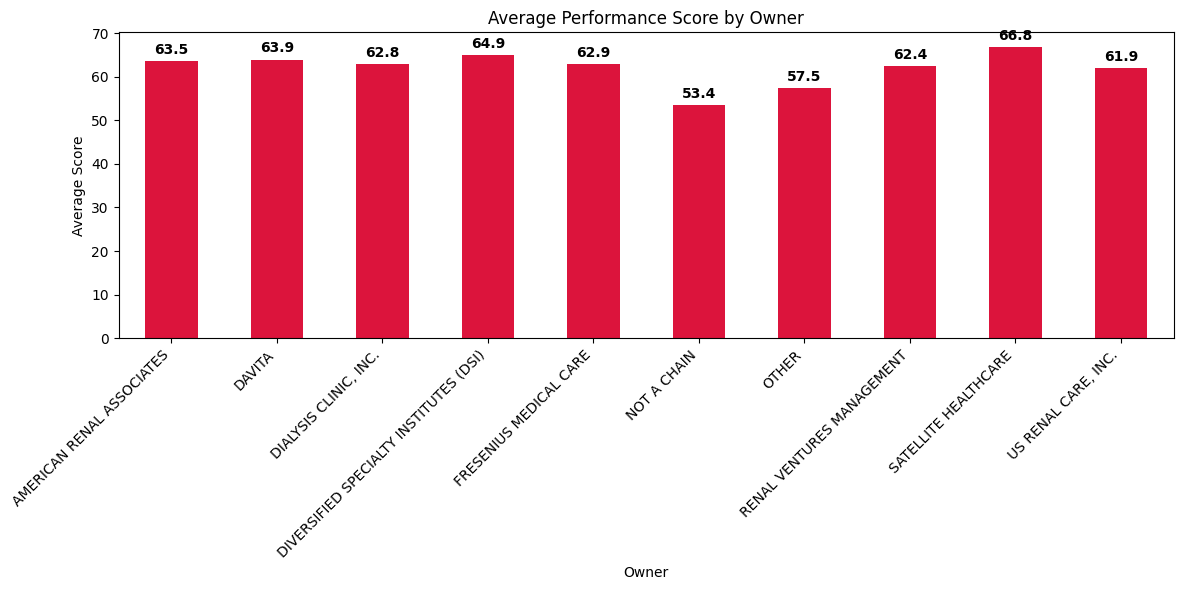

In [24]:
plt.figure(figsize=(12, 6))
ax = avg_scores.plot(kind='bar', color='crimson')
plt.title('Average Performance Score by Owner')
plt.xlabel('Owner')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')

# Add value labels
ax.bar_label(ax.containers[0], fmt='%.1f', padding=3, fontweight='bold') #'%.1f' shows 1 decimal

plt.tight_layout()
plt.show()

In [25]:
#Q4: create a correlation heatmap
#First we need to import a new library seaborn
import seaborn as sns
import numpy as np

#Select only the fields needed for the correlation
df_corr = df_filt[['Total Performance Score',
                   'VAT Catheter Measure Score',
                   'ICH CAHPS Measure Score',
                   'Vascular Access Combined Measure Score'
                   ]].copy()

# Replace 'No Score' with NaN and convert to numeric
for col in ['VAT Catheter Measure Score', 'ICH CAHPS Measure Score', 'Vascular Access Combined Measure Score']:
    df_corr[col] = df_corr[col].replace('No Score', np.nan).astype(float)


#Check data types
df_corr.dtypes

,0
Total Performance Score,int64
VAT Catheter Measure Score,float64
ICH CAHPS Measure Score,float64
Vascular Access Combined Measure Score,float64


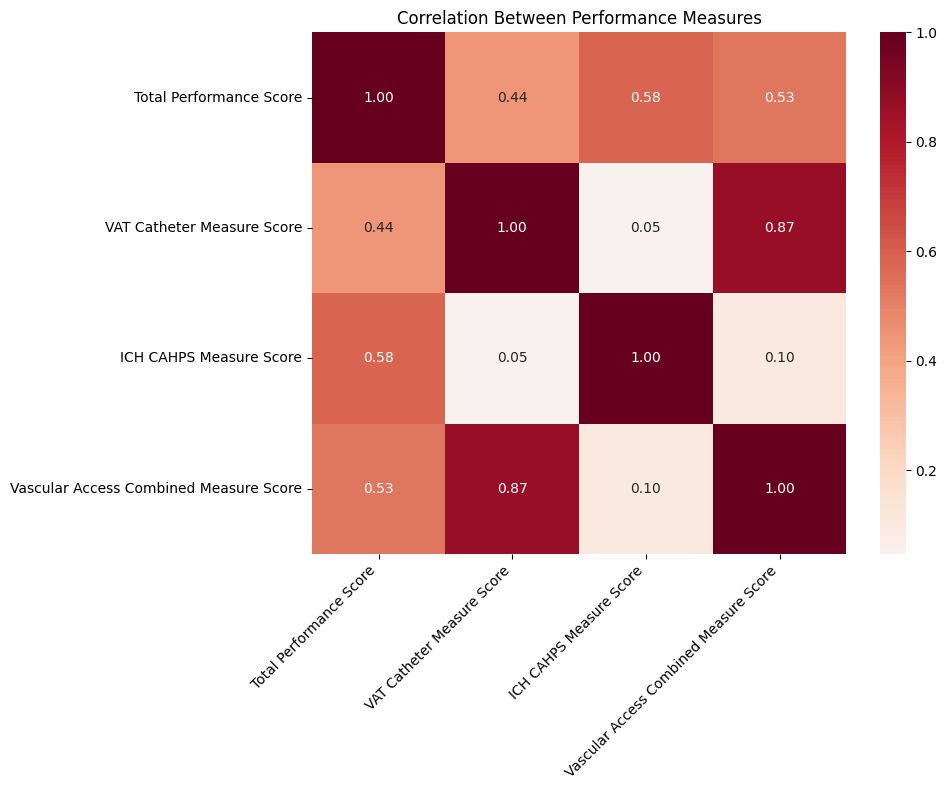

In [26]:
# Make heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
   df_corr.corr(),
   annot=True,
   cmap='RdBu_r',
   center=0,
   fmt='.2f'
)
plt.title('Correlation Between Performance Measures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()